## import the neccessary libraries for preprocessing and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IMDb_Dataset.csv")
data.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [3]:
# get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.2+ KB


In [4]:
# get statistical information
data.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,400.000000,400.000000,400.000000,400.000000
mean,7.110250,2015.150000,66.898750,116.334750
std,0.932251,13.470194,15.312006,21.369757
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2010.750000,57.750000,101.000000
50%,7.100000,2023.000000,66.900000,116.000000
75%,7.700000,2024.000000,77.000000,124.000000
max,9.200000,2025.000000,100.000000,206.000000


In [5]:
# check for duplicate values
def chk_duplicate(data):
    chk = data.duplicated()
    for i in chk:
        if i==True:
            print("duplicate values")
        else:
            print("no duplicate value")
        break

In [6]:
chk_duplicate(data)

no duplicate value


In [7]:
data = data.drop_duplicates()

In [8]:
chk_duplicate(data)

no duplicate value


# Exploratory Data Analysis (EDA)

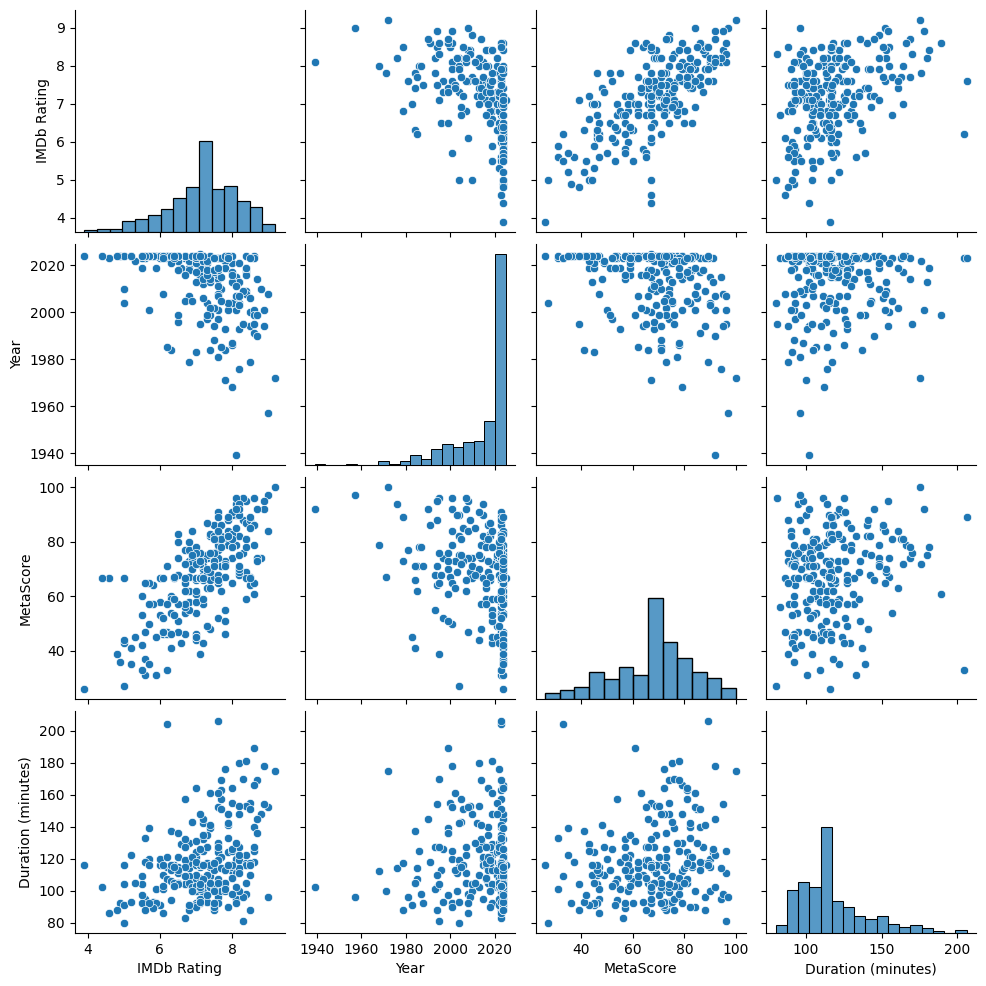

In [9]:
sns.pairplot(data)

# Analyzing Relationship (bivarate analysis)

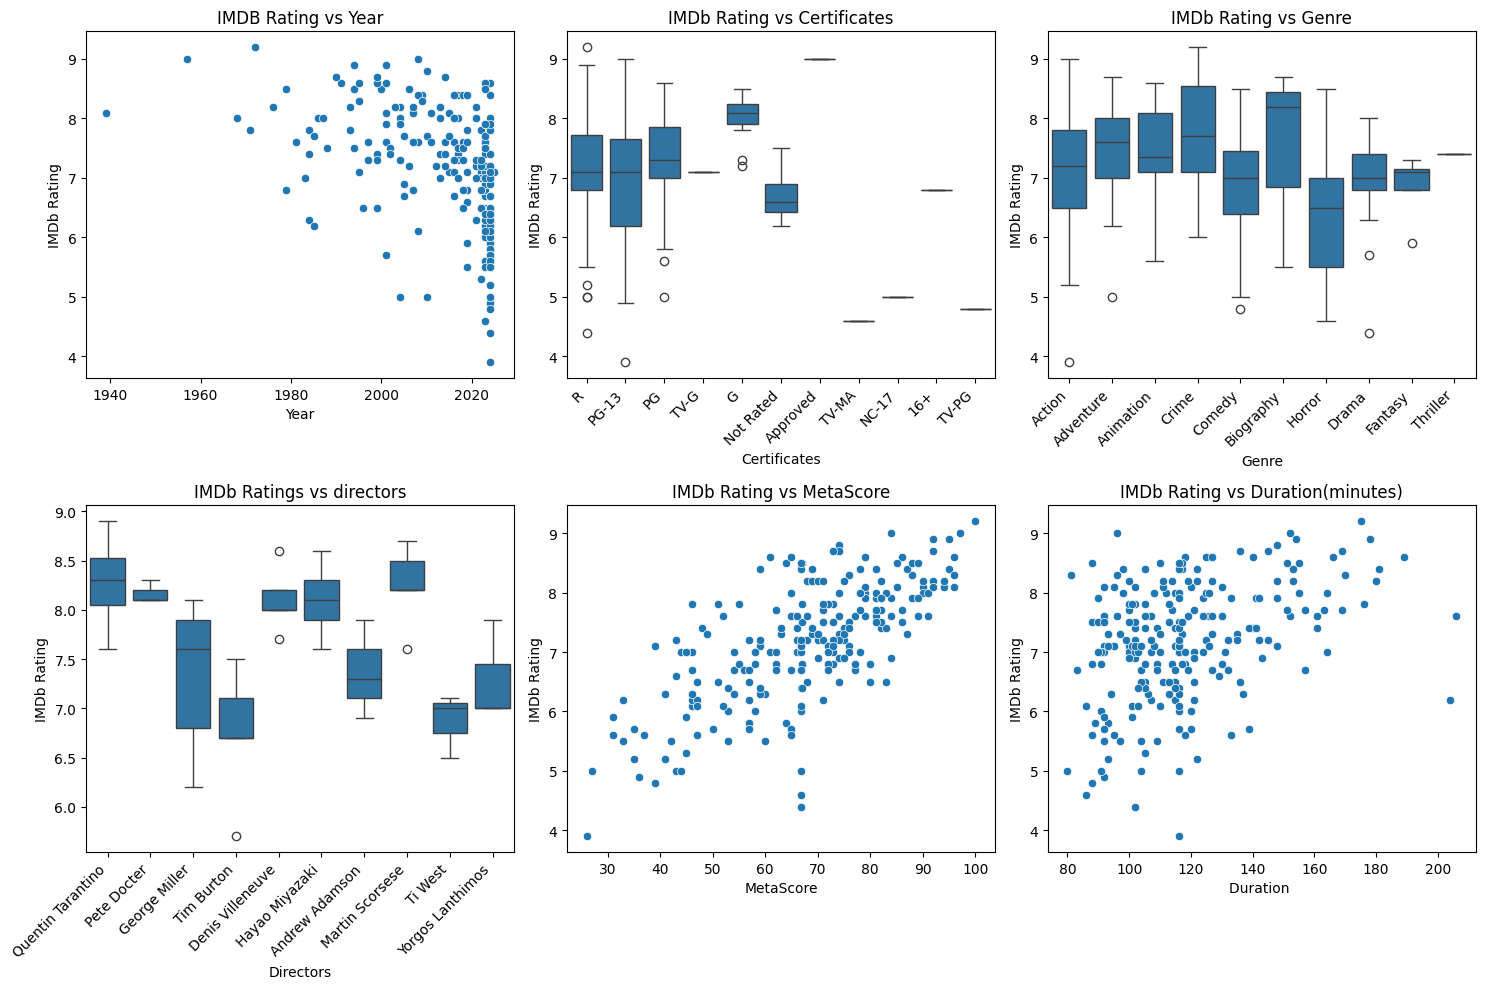

In [9]:
plt.figure(figsize=(15,10))

# imdb rating vs year
plt.subplot(2,3,1)
sns.scatterplot(data, x="Year",y="IMDb Rating")
plt.title("IMDB Rating vs Year")
plt.xlabel("Year")
plt.ylabel("IMDb Rating")

# imdb rating vs certificates
plt.subplot(2,3,2)
sns.boxplot(data,x="Certificates",y="IMDb Rating")
plt.title("IMDb Rating vs Certificates")
plt.xlabel("Certificates")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45,ha="right")
# imdb rating vs Genre
plt.subplot(2,3,3)
sns.boxplot(data,x="Genre",y="IMDb Rating")
plt.title("IMDb Rating vs Genre")
plt.xlabel("Genre")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45,ha="right")

# IMDb Ratings vs. Director (Top 10 Directors by count)
top_directors = data["Director"].value_counts().index[:10]
plt.subplot(2,3,4)
sns.boxplot(data=data[data["Director"].isin(top_directors)],x = "Director",y="IMDb Rating")
plt.title("IMDb Ratings vs directors")
plt.xlabel("Directors")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45,ha="right")

#IMDb Ratings vs Meta Score
plt.subplot(2,3,5)
sns.scatterplot(data,x="MetaScore",y="IMDb Rating")
plt.title("IMDb Rating vs MetaScore")
plt.xlabel("MetaScore")
plt.ylabel("IMDb Rating")

# IMDb Ratings vs. Duration (minutes)
plt.subplot(2,3,6)
sns.scatterplot(data,x="Duration (minutes)",y="IMDb Rating")
plt.title("IMDb Rating vs Duration(minutes)")
plt.xlabel("Duration ")
plt.ylabel("IMDb Rating")

plt.tight_layout()
plt.show()

In [10]:
data["Director"].value_counts().index[:5]

Index(['George Miller', 'Denis Villeneuve', 'Tim Burton', 'Martin Scorsese',
       'Quentin Tarantino'],
      dtype='object', name='Director')

## univarate Analysis

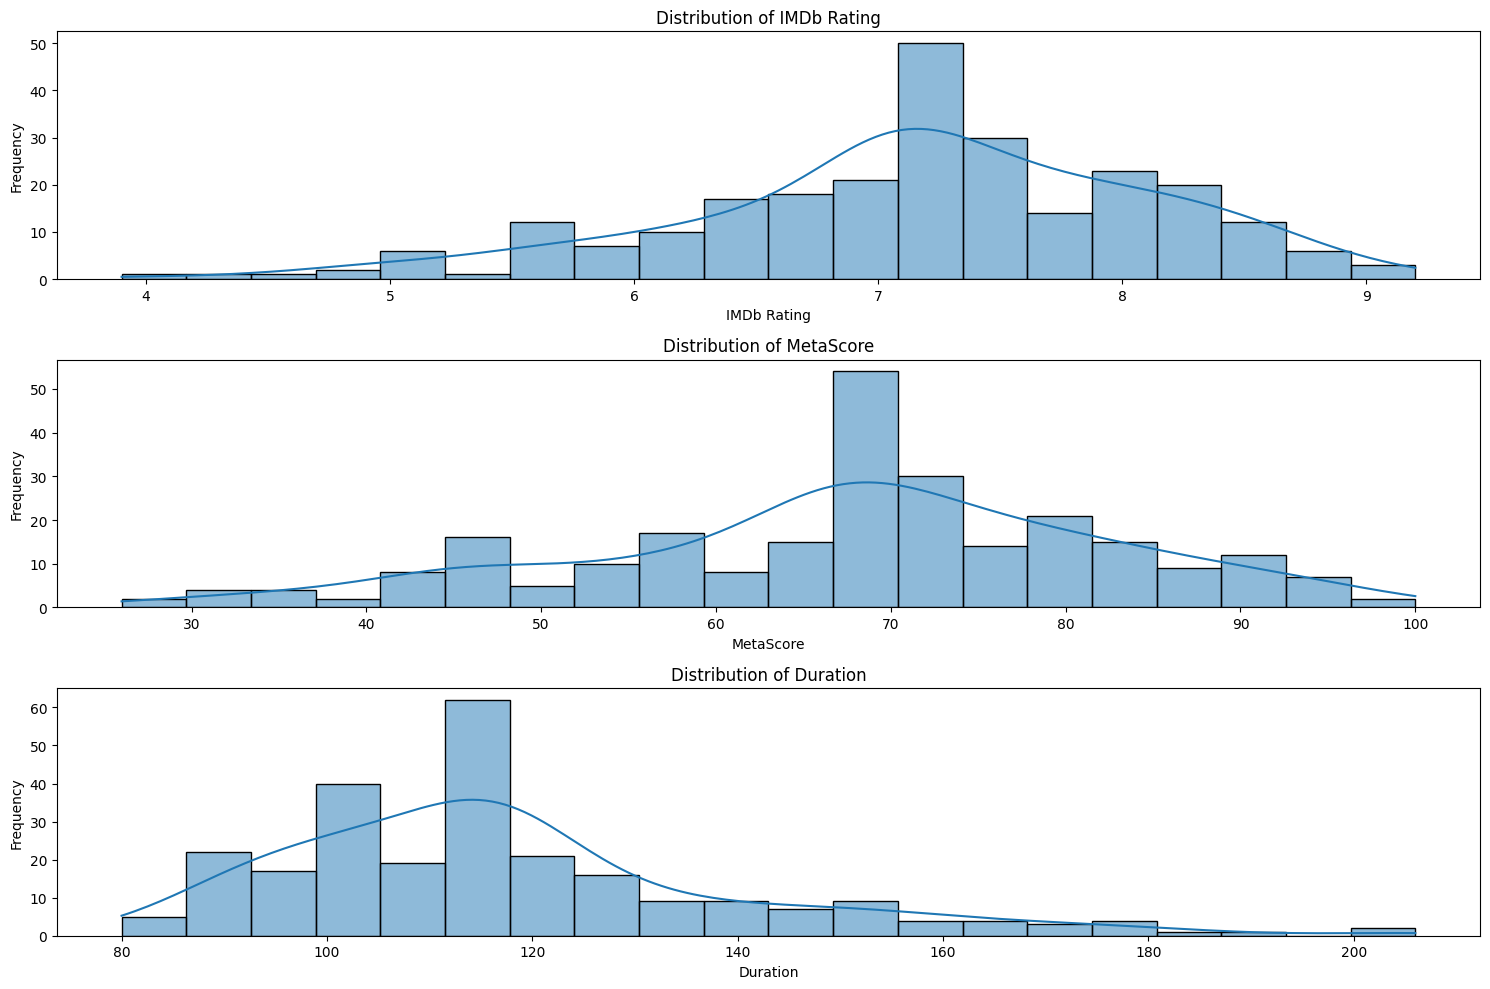

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(data["IMDb Rating"],bins=20,kde=True)
plt.title("Distribution of IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")

plt.subplot(3,1,2)
sns.histplot(data["MetaScore"],bins=20,kde=True)
plt.title("Distribution of MetaScore")
plt.xlabel("MetaScore")
plt.ylabel("Frequency")

plt.subplot(3,1,3)
sns.histplot(data["Duration (minutes)"],bins=20,kde=True)
plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
# Distribution of analysis of categorical data

categorical_summary = data[["Certificates","Genre","Director"]].describe()
categorical_summary

,Certificates,Genre,Director
count,255,255,255
unique,11,10,199
top,R,Action,George Miller
freq,128,79,5


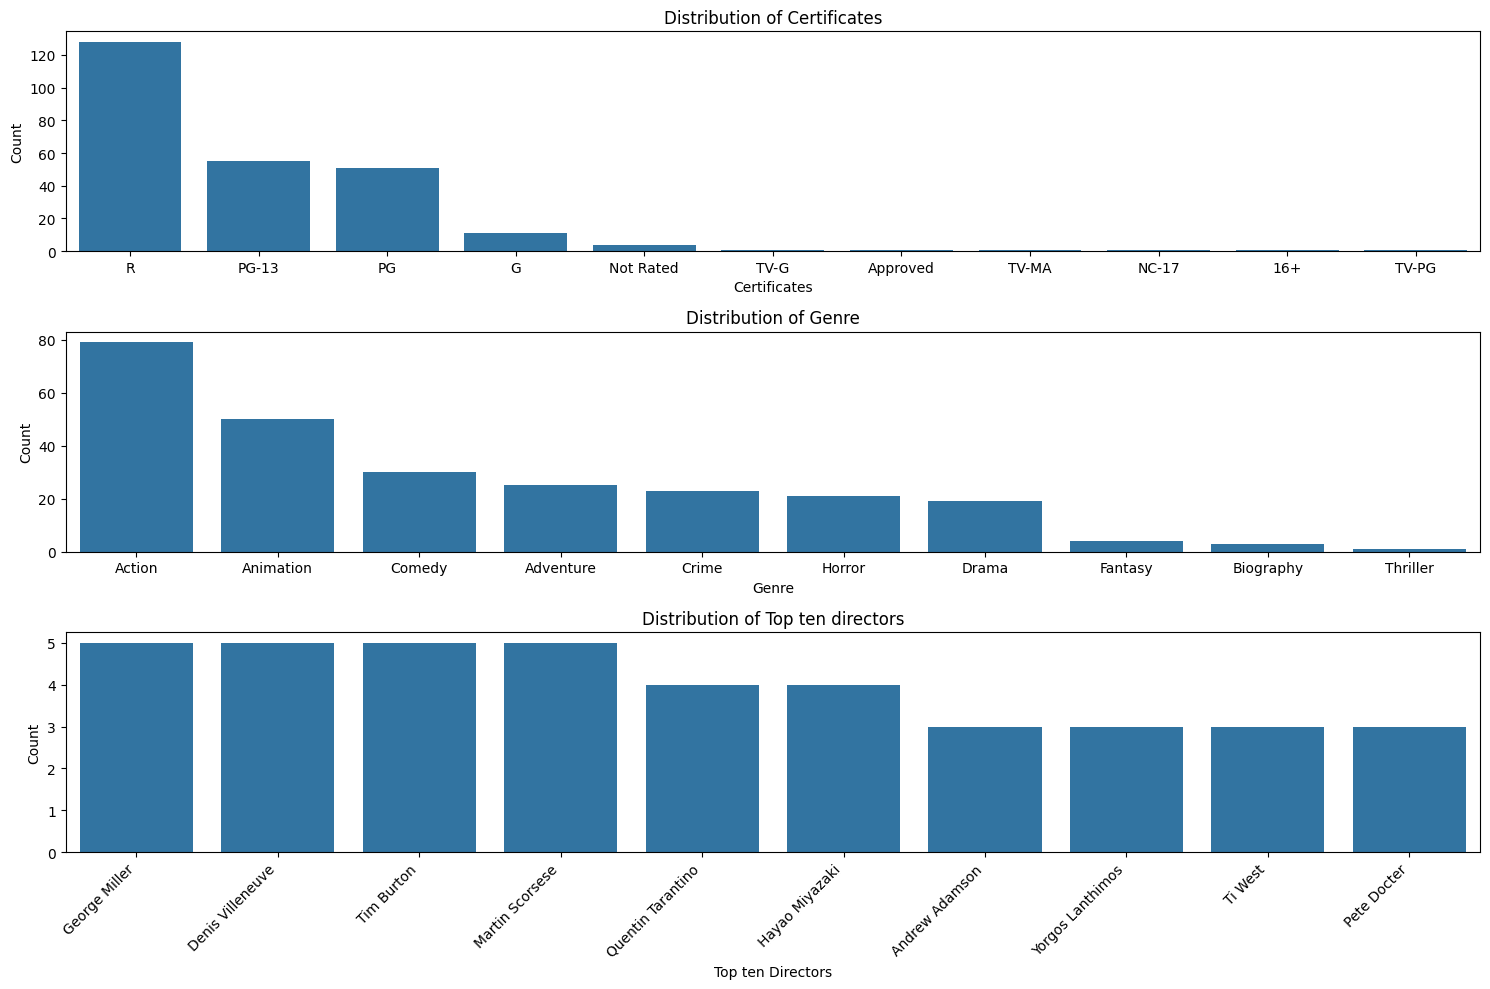

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.countplot(data=data,x="Certificates",order=data["Certificates"].value_counts().index)
plt.title("Distribution of Certificates")
plt.xlabel('Certificates')
plt.ylabel('Count')

plt.subplot(3,1,2)
sns.countplot(data=data,x="Genre",order=data['Genre'].value_counts().index)
plt.title("Distribution of Genre")
plt.xlabel("Genre")
plt.ylabel("Count")

top_10_directors = data["Director"].value_counts().index[:10]
plt.subplot(3,1,3)
sns.countplot(data=data[data["Director"].isin(top_10_directors)],x="Director",order=top_10_directors)
plt.title("Distribution of Top ten directors")
plt.xlabel("Top ten Directors")
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")

plt.tight_layout()
plt.show()

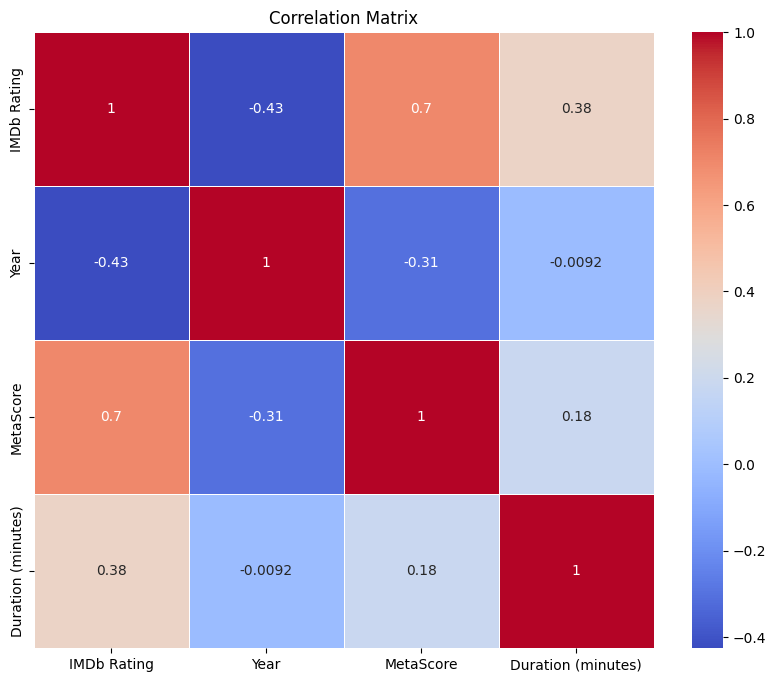

In [30]:
# correlation matrix
corr_matrix = data.drop(["Director","Genre","Certificates","Title","Star Cast"],axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

#### movie Recommendation

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
df=data.copy()

In [18]:
df

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3
...,...,...,...,...,...,...,...,...,...
391,Anyone But You,6.1,2023,R,Comedy,Will Gluck,Ilana WolpertWill Gluck,52.0,103.0
394,Kinds of Kindness,7.0,2024,R,Comedy,Yorgos Lanthimos,Efthimis FilippouYorgos Lanthimos,72.0,164.0
395,Mother of the Bride,4.8,2024,TV-PG,Comedy,Mark Waters,Brooke ShieldsMiranda CosgroveBenjamin Bratt,39.0,88.0
397,The Idea of You,6.4,2024,R,Comedy,Michael Showalter,Anne HathawayNicholas GalitzineElla Rubin,67.0,115.0


In [19]:
# combine relevant features into a single string
df["combined_features"]= data['Genre'] + ' ' + data['Director'] + ' ' + data['Certificates']

In [22]:
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes),combined_features
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0,Action Ridley Scott R
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0,Action Christopher McQuarrie PG-13
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0,Action Zack Snyder PG-13
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0,Adventure Quentin Tarantino R
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3,Action Eli Roth R


In [52]:
# create tf-idf matrix

tfidf = TfidfVectorizer(stop_words = "english")
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim[:10]

array([[1.        , 0.06840234, 0.06806689, ..., 0.        , 0.        ,
        0.07706235],
       [0.06840234, 1.        , 0.19736119, ..., 0.04130141, 0.        ,
        0.2234437 ],
       [0.06806689, 0.19736119, 1.        , ..., 0.04109886, 0.        ,
        0.22234791],
       ...,
       [0.        , 0.05093091, 0.05068114, ..., 0.04430582, 0.        ,
        0.05737896],
       [0.05854872, 0.05478458, 0.05451591, ..., 0.27106626, 0.        ,
        0.06172053],
       [0.        , 0.05192526, 0.05167062, ..., 0.04517083, 0.        ,
        0.05849921]])

In [80]:

# Function to get movie recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip()
    if title not in df['Title'].values:
        print("movie not available")
        return None,None
    # Get the index of the movie that matches the title
    idx = df[df['Title'] ==title].index[0]
  

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [81]:
import ipywidgets as widgets
from IPython.display import display

In [83]:
movie_input = widgets.Text(
    placeholder='Enter a movie name',
    description='Movie:',
    disabled=False
)

# Define a button widget
button = widgets.Button(description="Find Movies")

# Define an output widget for displaying the recommendations
output = widgets.Output()


# Define a function to handle button click event
def on_button_clicked(b):
    with output:
        # Clear previous output
        output.clear_output()
        
        # Get the input movie name
        title = movie_input.value
        
        # Get recommendations
        recommendations = get_recommendations(title)
        
        # Display recommendations
        print("Recommended movies:")
        for movie in recommendations:
            print("-", movie)

# Link the button click event to the function
button.on_click(on_button_clicked)

# Display the widgets
display(movie_input)
display(button)
display(output)

Text(value='', description='Movie:', placeholder='Enter a movie name')

Button(description='Find Movies', style=ButtonStyle())

Output()